choose best model


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


In [26]:
df=pd.read_csv('data/stud.csv')

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
df.shape

(1000, 8)

In [29]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [32]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [33]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [34]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())
print("Categories in 'race/ethnicity' variable:   ",end=" ")
print(df['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable:   ",end=" ")
print(df['parental level of education'].unique())
print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race/ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']


In [35]:
#define numerical & categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("We have {} numerical features:{}".format(len(numeric_features),numeric_features))
print("We have {} categorical features:{}".format(len(categorical_features),categorical_features))


We have 3 numerical features:['math score', 'reading score', 'writing score']
We have 5 categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [36]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Adding columns for total and avg score

In [37]:
##df['total score']=df['math score']+df['reading score']+df['writing score']
##df['average']=df['total score']/3
##df.head()

In [38]:
X=df.drop(columns=['math score'],axis=1)

In [39]:
y=df['math score']

In [40]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [41]:
##reading_full=df[df['reading score']==100]['average'].count()

##print(reading_full)

In [42]:
##Pipelining process
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [43]:
X=preprocessor.fit_transform(X)

In [44]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [45]:
##fig,axs=plt.subplots(1,2,figsize=(15,7))
##plt.subplot(121)
##sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
##plt.subplot(122)
##ns.histplot(data=df,x='average',bins=30,hue='gender')
##plt.show()

We can check each everything by ploting


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(800, 19)

In [47]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [49]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
     "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGB":XGBRegressor(),
    "CatBoosting Reg":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()


}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
  ##Evaluate
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
  
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_train,y_train_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)


    print("---------------------------------------")
    print("Training Performance:")
    print(f"MAE  : {model_train_mae}")
    print(f"RMSE : {model_train_rmse}")
    print(f"R²   : {model_train_r2}")

# Print testing results
    print("\nTesting Performance:")
    print(f"MAE  : {model_test_mae}")
    print(f"RMSE : {model_test_rmse}")
    print(f"R²   : {model_test_r2}")
   
  
    print("---------------------------------------")
   



Linear Regression
---------------------------------------
Training Performance:
MAE  : 4.267109375
RMSE : 5.32433481852575
R²   : 0.8742565651513869

Testing Performance:
MAE  : 4.267109375
RMSE : 5.32433481852575
R²   : 0.8742565651513869
---------------------------------------
Lasso
---------------------------------------
Training Performance:
MAE  : 5.206302661246526
RMSE : 6.593815587795566
R²   : 0.8071462015863456

Testing Performance:
MAE  : 5.206302661246526
RMSE : 6.593815587795566
R²   : 0.8071462015863456
---------------------------------------
Ridge
---------------------------------------
Training Performance:
MAE  : 4.264987823725981
RMSE : 5.323324922741654
R²   : 0.8743042615212909

Testing Performance:
MAE  : 4.264987823725981
RMSE : 5.323324922741654
R²   : 0.8743042615212909
---------------------------------------
K-Neighbors Regressor
---------------------------------------
Training Performance:
MAE  : 4.516749999999999
RMSE : 5.707683417990174
R²   : 0.8554978341651

In [50]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','r2_square']).sort_values(by=['r2_square'],ascending=False)

,Model Name,r2_square
4,Decision Tree,0.999653
6,XGB,0.995500
5,Random Forest,0.976707
7,CatBoosting Reg,0.958936
2,Ridge,0.874304
0,Linear Regression,0.874257
3,K-Neighbors Regressor,0.855498
8,AdaBoost Regressor,0.850907
1,Lasso,0.807146


#Video me linear reg was giving better r2 score

In [51]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of model is %.2f"%score)

Accuracy of model is 88.03


Text(0, 0.5, 'predicted')

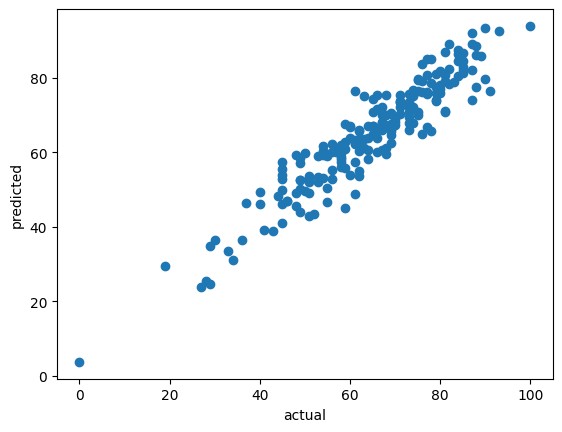

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")

In [53]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
